In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv

###------------ 자료 구성 클래스 코드 -----------------------------------------------------------------###


class CsvDATA: # csv 파일 불러와 작업할 클래스 
    def __init__(self,fname): # 클래스 적용하고 받아온 값이  'fname'  ex)'Data_List_A3.csv'  
        self.lists=[]   # 데이터를 넣을 공간 확보 
        file=open(fname,encoding='cp949') # 변수명=open(파일 경로,encoding 작업) 불러올 파일 경로 설정 및 코딩
        getline = csv.reader(file)  #불러온 파일에 변수명 배정 
        line_count=0  # csv 파일에 불필요한 데이터 건너띄기에 사용할 비교대상 카운트 0 설정 
        for i in getline:  #  getline 이 위에서 설정한 파일의 변수명 // 해당 파일의 요소를 하나씩 나열
            if line_count>5:   # 위의 나열을 시킬때에는 6번을 건너띄어라 0부터 5까지 
                self.lists.append(i)  # 7번째부터 list에 순서대로 넣어라  
            line_count+=1 # 건너띄기용 카운트 
        file.close() # 파일을 list 화 완료후 닫기 

    def Counts_Genre(self,list_input,genre_list): #  장르별 카운트를 위한 메소드 // get_years_data[i],Genre_List를 받아옴
        count_list=[]  # 리턴할 빈 리스트 생성 
        for genre in genre_list:  # 위에서 받아온 Genre_List를 나열 
            count_list.append(0) # 위에서 나열된 Genre_List 의 요소 수(10개) 만큼 0의 값을 count_list 에 추가 
                                  # ex) count_list=[0,0,0,0,0,0,0,0,0,0,0]
    
        for i in list_input: #  받아온 get_years_data[i] 를 나열 
            for idx,name_input in enumerate(genre_list): 
                # enumerate 기능을 이용해 Genre_List의 요소들과 함께 요소의 위치(idx)를 같이 나열가능
                # ex)[0]=액션 ,[1]=드라마, [2]=코미디 
                if name_input in i[11]: #위에 나열된 i 들 중의 [11] 위치의 값에 위의 나열된 name_input의 일치하는 값이 있을때 실행  
                    count_list[idx]+=1 # ex) count_list에 나열된 i의 자료에서 genre_list 과 일치하는 값이 나오면 그 위치에 +1 카운트
        return count_list # 작성완료된 count_list 값을 반환 
    
    def GetYearList(self,years_list): # 무질서한 데이터를 년도별로 정리하기 위한 메소드
        Data_list_years=[] # 리턴할 빈 리스트 생성 
        for year in years_list:  # 가져온 Years_List 값을 나열 
            Data_list_years.append([]) # 나열시킨 Years_List 의 요소수 만큼 빈 [](list) 공간을 Data_list_years 에 append

        datas=self.lists.copy() # CSVDATA에서 불러온 원본데이터 복사 하여 변수 지정 
                                #(기존 원본데이터를 손대지 않고 복사본으로 작업을 위해서)
        for data in datas: # 복사본데이터인 datas 를 나열 
            for idx,year in enumerate(years_list): # Years_List 값을 enumerate(idx와 짝지어줌) 배열 ex)[0]=2011 ,[1]=2012, [2]=2013 
                if year in data[2]:  # 나열한 데이터 값[2]에서 Years_List의 요소와 일치하는 값이 있으면 실행
                    Data_list_years[idx].append(data) 
                    # ex) data[2]에 Years_List의 요소 2011이 일치하면 2011이 가지고 있는 Data_list_years[0] 에 해당 데이터 라인을 추가
                    # data[2]에 Years_List의 요소 2012가 일치하면 2012가 가지고 있는 Data_list_years[1] 에 데이터 라인을 추가 
        return Data_list_years # 년도별 순서대로 만들어진 Data_list_years 리스트를 반환 
    
    def Count_audience(self,list_input,genre_list): # 관객수 카운트를 위한 메소드 
        audience_list=[] # 리턴할 빈 리스트 생성 
        for audience in genre_list: # 받아온 Genre_List를 나열 
            audience_list.append(0) # 나열된 Genre_List의 요소의 갯수 만큼 '0'값을 가지는 요소를 audience_list에 순서대로 append
    
        for i in list_input: # 입력된 get_years_data[i] 의 값을 나열
            for idx,name_input in enumerate(genre_list): # Genre_List 요소의 idx ( 방배정) 배정 'GetYearList'처럼 위와 동일 
                if name_input in i[11]: # 위의 get_years_data[i] 를 나열해놓은 i[11] 에서 나열한 Genre_List 요소와 일치 할경우 실행 
                    i[5]=i[5].replace(',','') # 나열된 get_years_data[i] 의 [5] 값에서 , 를 지우기 
                    audience_list[idx]+=int(i[5])*0.0001 
                    # ,를 없앤 값을 int 화 시키고 아래 그래프 값의 단위를 위해 1/10000 적용후 audience_list[idx] 에 누적 
        
        return audience_list # 완성된 리스트 반환 


In [26]:
###--------- 자료 구성 코드 ------------------------------------------###
    
        
dataA3 = CsvDATA('Data_List_A3.csv') # CsvDATA 클래스에 값을 보내고 해당 값에 변수를 지정 
Years_List=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'] # Years_List 라는 리스트 생성
Genre_List=['액션','드라마','코미디','어린이','스릴러','판타지','SF','모험','뮤지컬','전쟁'] # Genre_List 라는 리스트 생성
get_years_data=dataA3.GetYearList(Years_List) # 위의 클래스적용시켜 받아낸 자료값에 GetYearList메소드 적용 

AudienceCount_list=[]  # 각 년도별 + 장르별 관객수 리스트을 넣기위한 빈리스트 생성 

for i in range(len(Genre_List)): # Genre_List 의 요소수만큼 나열
    AudienceCount_list.append(dataA3.Count_audience(get_years_data[i],Genre_List))
    # Count_audience메소드로 작업한 값을 AudienceCount_list에 순서대로 추가
    
Graph_AudienceCount_list=[[],[],[],[],[],[],[],[],[],[]] 
# 그래프2번에서 받는 값의 순서를 위해서 그래프용 축뒤집기를 위한 빈리스트 생성(x축 y축 서로 값 바꾸기)  
for i in range(len(AudienceCount_list)): # AudienceCount_list 의 요소 수 만큼 나열
    for j in range(len(AudienceCount_list)): # AudienceCount_list 의 요소 수 만큼 나열
        Graph_AudienceCount_list[i].append(AudienceCount_list[j][i])
        # 나열해놓은 값을 [j][i] Graph_AudienceCount_list에 순서대로 다시 추가 
        #아래 AudienceCount_list 와 Graph_AudienceCount_list 를 아웃으로 확인가능 

Graph_GenreCount_list=[] # 년도별 장르별 카운트 저장위한 빈리스트 생성 
for i in range(len(Genre_List)):  # 장르의 수 만큼 반복 
    Graph_GenreCount_list.append(dataA3.Counts_Genre(get_years_data[i],Genre_List)) 
    #Counts_Genre 의 반환값을 순서대로 Graph_GenreCount_list 에 추가 

Graph1_list=dict(zip(Years_List,Graph_GenreCount_list)) # 그래프 1용 results 값 
Graph2_list=dict(zip(Genre_List,Graph_AudienceCount_list)) # 그래프 2용 값
# 그래프 가 요구하는대로 입력 받는 값을 딕셔너리로 묶어서 배정



In [27]:
#get_years_data

#AudienceCount_list
#Graph_AudienceCount_list


#Graph_GenreCount_list
#Graph1_list
#Graph2_list

In [28]:
###-------------  그래프 함수 코드 ----------------------------###



def Bar_Graph1(category_names,results):
    
    plt.rcParams["font.family"] = 'NanumGothic'

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Spectral_r')(np.linspace(0.9, 0.1, data.shape[1])) # RdYlGn  0.15, 0.85

    fig, ax = plt.subplots(figsize=(12.8,5))    # 9.2:5
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'# if r * g * b < 0.3 else 'black'
        box1 = {'boxstyle': 'round','ec': (1.0, 0.5, 0.5),'fc': 'white'}
        for y, (x, c) in enumerate(zip(xcenters, widths)):
              if c > 0:  # value 값이 0일때 건너띄기 1이상일 경우에만 표기
                    ax.text(x, y, str(int(c)), ha='center', va='center',color=text_color,bbox=box1)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize=10)
    #xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None

    plt.savefig('ex_barvplot.png', format='png', dpi=300) # 자료로 쓸수 있는 그래프 이미지 외부저장
    return fig, ax
    

def Bar_Graph2(models,yticks,data):
    
    plt.rcParams["font.family"] = 'NanumGothic'
    
    #### 1. bar plot으로 나타낼 데이터 입력
    
    models = models
    yticks = yticks
    data = data

    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(14,18))
    colors = ['salmon','orange','skyblue','gold','darkviolet','fuchsia',\
              'limegreen','darkgreen','cadetblue','blue','']
    height = 0.1

    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(yticks, height, i, models)
        bar = ax.barh(pos, data[model], height=height*0.95, label=model, color=colors[i])
        present_width(ax, bar) # bar너비 출력

    #### 4. x축 세부설정
    ax.set_xlim([0,9000])
    ax.set_xticks([0, 1500, 3000, 5000, 7000, 9000])
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_xlabel("역대 박스 오피스중 장르및 년도별 관객수 변화 ( '관객 단위 : 만 명' )", fontsize=12)
    
    #### 5. y축 세부설정
    ax.set_yticks(range(len(yticks))) # 메인 ytick len 크기 만큼 
    ax.set_yticklabels(yticks, fontsize=10)
    #ax.set_ylabel('Years', fontsize=14)

    #### 6. 범례 나타내기
    box = ax.get_position() # 범례를 그래프상자 밖에 그리기위해 상자크기를 조절
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center right', bbox_to_anchor=(1,0.5), shadow=True, ncol=1)

    #### 7. 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

    #### 8. 그래프 저장하고 출력하기
    plt.savefig('ex_barhplot.png', format='png', dpi=300)
    plt.show()

def present_width(ax, bar):
    for rect in bar:
        width = rect.get_width()
        if width<1:
            continue
        posx = width*1.01
        posy = rect.get_y()+rect.get_height()*0.5
        ax.text(posx, posy, '%d' % width, rotation=0, ha='left', va='center')
    
    
def compute_pos(yticks, height, i, models):
    index = np.arange(len(yticks))
    n = len(models)
    correction = i +0.1*(n-1)
    return index + height * correction



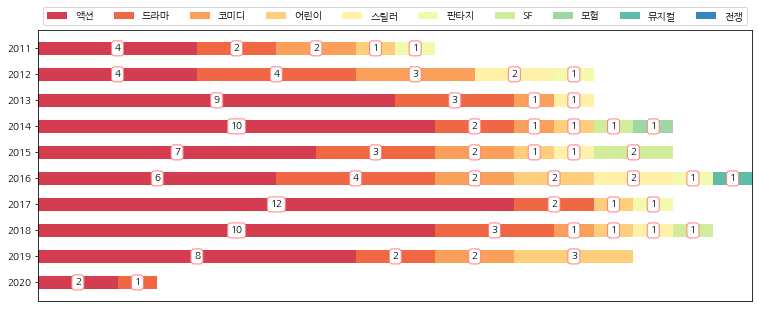

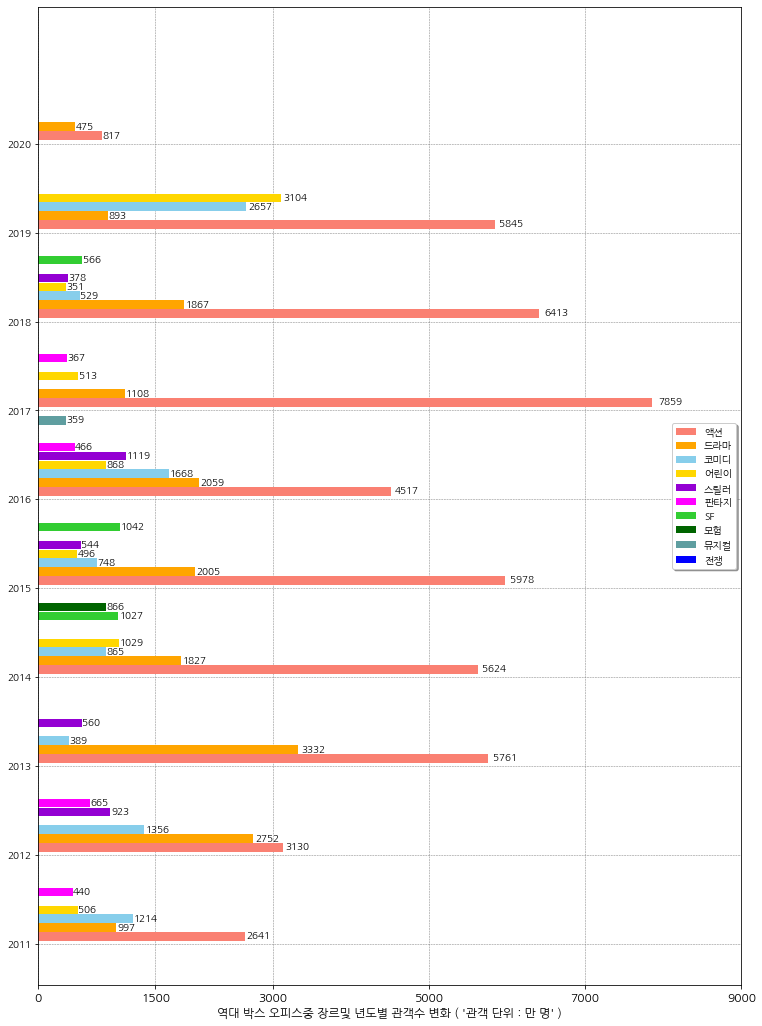

In [29]:

###---------- 그래프 프린트 코드 -----------------------------------------------------------###


Bar_Graph1(Genre_List,Graph1_list)
Bar_Graph2(Genre_List,Years_List,Graph2_list)

plt.show()